## Video games Sales :

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [157]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('vgsales.csv')

In [126]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,No. of game
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


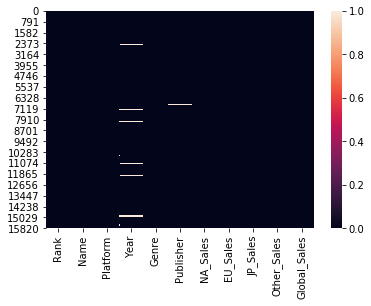

In [19]:
sns.heatmap(df.isnull())

In [25]:
df.dropna(inplace=True)

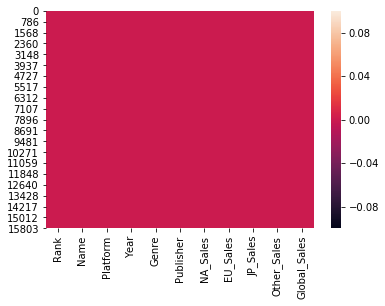

In [26]:
sns.heatmap(df.isnull())

In [28]:
df['Year'] = df['Year'].apply(np.int64)

In [114]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,No. of game
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,1
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,1
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,1
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1


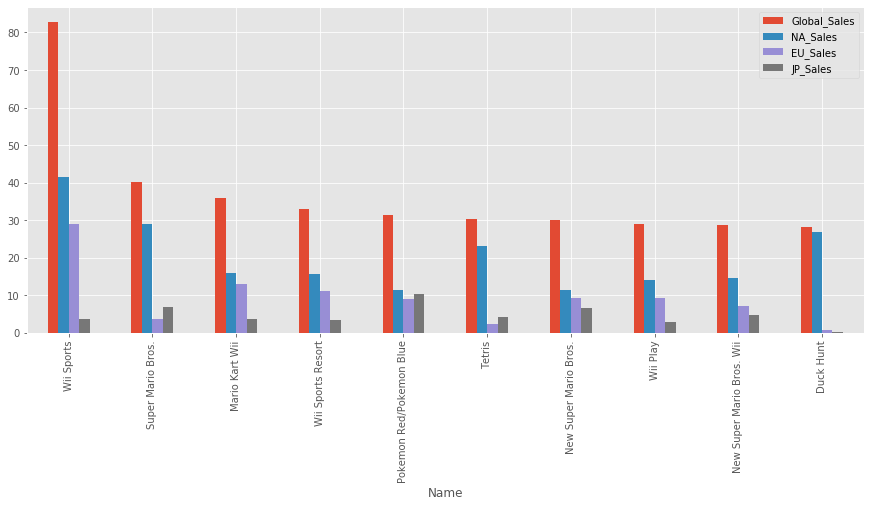

In [230]:
df.head(10).plot(kind='bar',x='Name',y=['Global_Sales','NA_Sales','EU_Sales','JP_Sales'],figsize=(15,6))

In [41]:
df['Publisher'].value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [43]:
df['No. of game'] = 1

In [102]:
df1 = df.groupby('Publisher').sum()[['Global_Sales','No. of game','NA_Sales','EU_Sales','JP_Sales']].sort_values(by='Global_Sales',ascending=False)

In [103]:
df1.reset_index(inplace=True)

In [104]:
df1['Sale_per_game'] = df1['Global_Sales']/df1['No. of game']

### Publishers making most number of games :

In [138]:
df1.sort_values(by='No. of game',ascending=False).head(10)

,Publisher,Global_Sales,No. of game,NA_Sales,EU_Sales,JP_Sales,Sale_per_game
1,Electronic Arts,1093.39,1339,584.22,367.38,13.98,0.816572
2,Activision,721.41,966,426.01,213.72,6.54,0.746801
9,Namco Bandai Games,253.65,928,69.38,42.61,126.84,0.273330
4,Ubisoft,473.54,918,252.81,163.03,7.33,0.515839
7,Konami Digital Entertainment,278.56,823,88.91,68.62,90.93,0.338469
6,THQ,340.44,712,208.60,94.60,5.01,0.478146
0,Nintendo,1784.43,696,815.75,418.30,454.99,2.563836
3,Sony Computer Entertainment,607.28,682,265.22,187.55,74.10,0.890440
8,Sega,270.70,632,108.78,81.41,56.19,0.428323
5,Take-Two Interactive,399.30,412,220.47,117.95,5.83,0.969175


<Figure size 720x432 with 0 Axes>

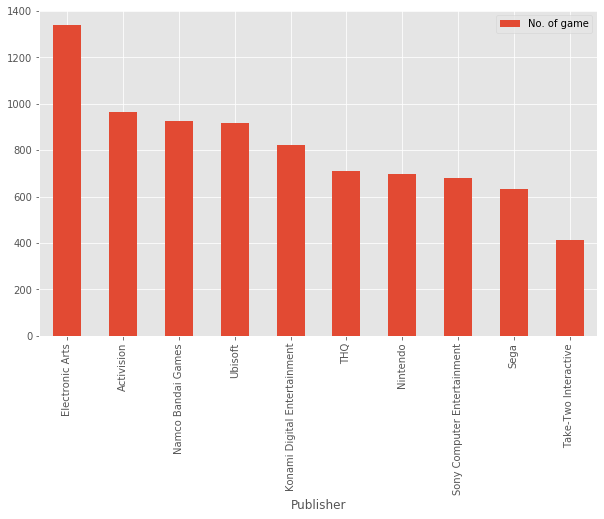

In [226]:
plot1 = df1[['Publisher','No. of game']].sort_values(by='No. of game',ascending=False).head(10)
plot1.plot(kind='bar',x='Publisher',y='No. of game',figsize=(10,6))

### Top 10 Publishers :

In [124]:
df1.sort_values(by='Global_Sales',ascending=False).head(10)

,Publisher,Global_Sales,No. of game,NA_Sales,EU_Sales,JP_Sales,Sale_per_game
0,Nintendo,1784.43,696,815.75,418.30,454.99,2.563836
1,Electronic Arts,1093.39,1339,584.22,367.38,13.98,0.816572
2,Activision,721.41,966,426.01,213.72,6.54,0.746801
3,Sony Computer Entertainment,607.28,682,265.22,187.55,74.10,0.890440
4,Ubisoft,473.54,918,252.81,163.03,7.33,0.515839
5,Take-Two Interactive,399.30,412,220.47,117.95,5.83,0.969175
6,THQ,340.44,712,208.60,94.60,5.01,0.478146
7,Konami Digital Entertainment,278.56,823,88.91,68.62,90.93,0.338469
8,Sega,270.70,632,108.78,81.41,56.19,0.428323
9,Namco Bandai Games,253.65,928,69.38,42.61,126.84,0.273330


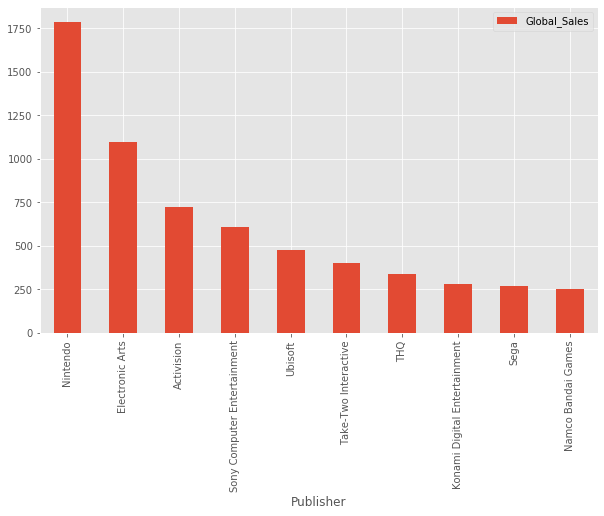

In [227]:
plot2 = df1.sort_values(by='Global_Sales',ascending=False).head(10)
plot2.plot(kind='bar',x='Publisher',y='Global_Sales',figsize=(10,6))

## Publishers with more than 400 games and high Sales per game ratio :

In [171]:
df1[df1['No. of game'] >= 400].sort_values(by='Sale_per_game',ascending=False).head(10)

,Publisher,Global_Sales,No. of game,NA_Sales,EU_Sales,JP_Sales,Sale_per_game
0,Nintendo,1784.43,696,815.75,418.30,454.99,2.563836
5,Take-Two Interactive,399.30,412,220.47,117.95,5.83,0.969175
3,Sony Computer Entertainment,607.28,682,265.22,187.55,74.10,0.890440
1,Electronic Arts,1093.39,1339,584.22,367.38,13.98,0.816572
2,Activision,721.41,966,426.01,213.72,6.54,0.746801
4,Ubisoft,473.54,918,252.81,163.03,7.33,0.515839
6,THQ,340.44,712,208.60,94.60,5.01,0.478146
8,Sega,270.70,632,108.78,81.41,56.19,0.428323
7,Konami Digital Entertainment,278.56,823,88.91,68.62,90.93,0.338469
9,Namco Bandai Games,253.65,928,69.38,42.61,126.84,0.273330


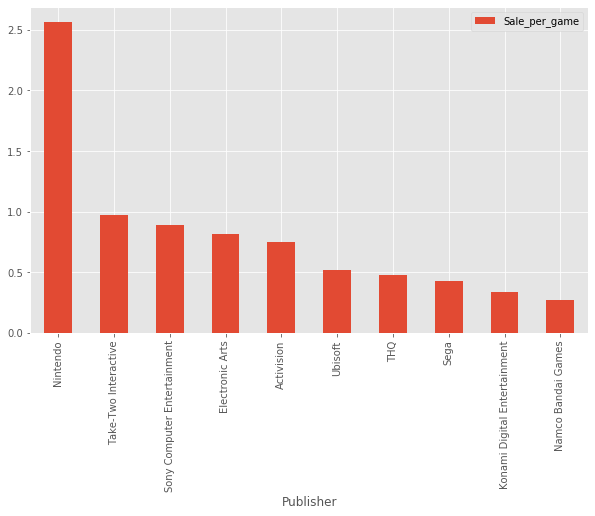

In [228]:
plot3 = df1[df1['No. of game'] >= 400].sort_values(by='Sale_per_game',ascending=False).head(10)
plot3.plot(kind='bar',x='Publisher',y='Sale_per_game',figsize=(10,6))

### Genrewise most selling games :

In [123]:
df.groupby('Genre').sum().drop(['Rank','Year'],axis=1).reset_index().sort_values(by='Global_Sales',ascending=False)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,No. of game
0,Action,861.77,516.48,158.65,184.92,1722.84,3251
10,Sports,670.09,371.34,134.76,132.65,1309.24,2304
8,Shooter,575.16,310.45,38.18,101.90,1026.20,1282
7,Role-Playing,326.50,187.57,350.29,59.38,923.83,1470
4,Platform,445.99,200.65,130.65,51.51,829.13,875
3,Misc,396.92,211.77,106.67,73.92,789.87,1686
6,Racing,356.93,236.31,56.61,76.68,726.76,1225
2,Fighting,220.74,100.00,87.15,36.19,444.05,836
9,Simulation,181.78,113.02,63.54,31.36,389.98,848
5,Puzzle,122.01,50.52,56.68,12.47,242.21,570


<b>Action genre games bring high Sales globally.</b>

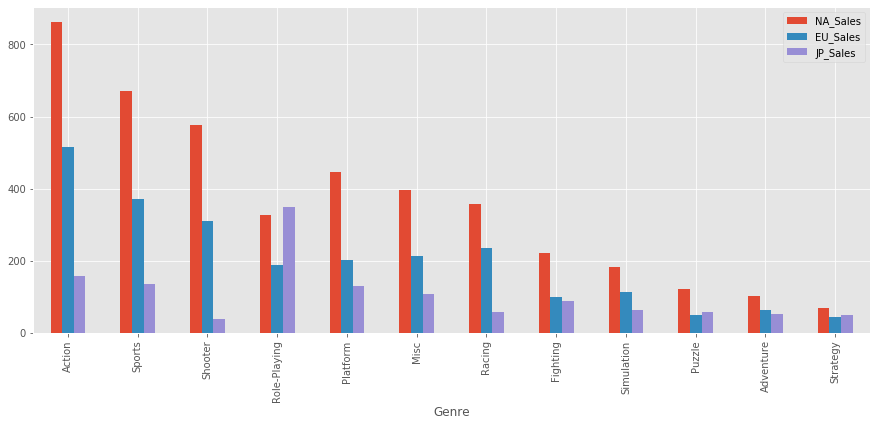

In [229]:
plot4 = df.groupby('Genre').sum().drop(['Rank','Year'],axis=1).reset_index().sort_values(by='Global_Sales',ascending=False)
plot4.plot(kind='bar',x='Genre',y=['NA_Sales','EU_Sales','JP_Sales'],figsize=(15,6))

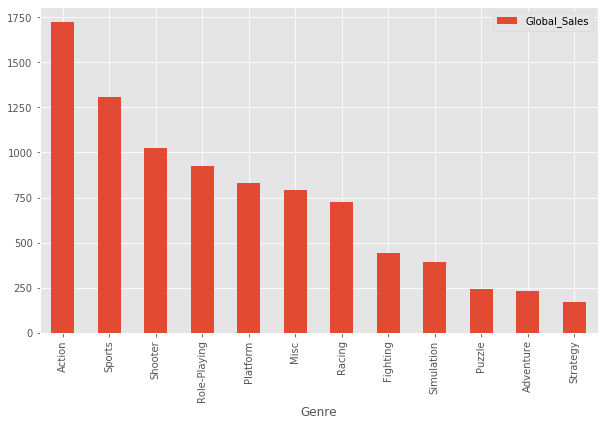

In [202]:
plot4.plot(kind='bar',x='Genre',y='Global_Sales',figsize=(10,6))

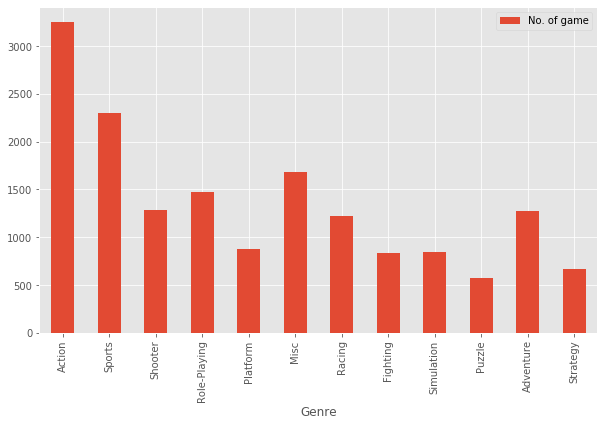

In [201]:
plot4.plot(kind='bar',x='Genre',y='No. of game',figsize=(10,6))

### Yearwise sales globally :

In [207]:
df.groupby('Year').sum().drop(['Rank'],axis=1).sort_values(by='Global_Sales',ascending=False).head(15).reset_index()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,No. of game
0,2008,351.44,184.40,60.26,82.39,678.90,1428
1,2009,338.85,191.59,61.89,74.77,667.30,1431
2,2007,311.18,160.18,60.29,77.58,609.92,1201
3,2010,304.24,176.57,59.49,59.90,600.29,1257
4,2006,263.12,129.24,73.73,54.43,521.04,1008
5,2011,241.00,167.31,53.04,54.39,515.80,1136
6,2005,241.58,121.56,54.28,40.55,458.51,936
7,2004,218.80,105.92,41.65,47.24,414.01,744
8,2002,216.19,109.74,41.76,27.28,395.52,829
9,2013,154.77,125.80,47.59,39.82,368.11,546


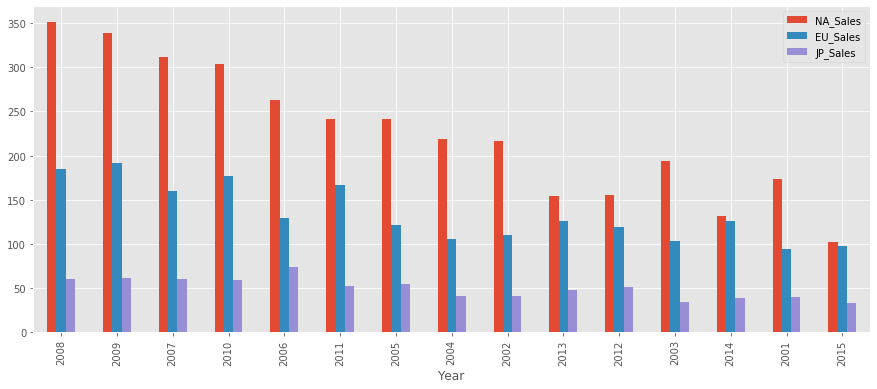

In [234]:
plot5 = df.groupby('Year').sum().drop(['Rank'],axis=1).sort_values(by='Global_Sales',ascending=False).head(15).reset_index()
plot5.plot(kind='bar',x='Year',y=['NA_Sales','EU_Sales','JP_Sales'],figsize=(15,6))

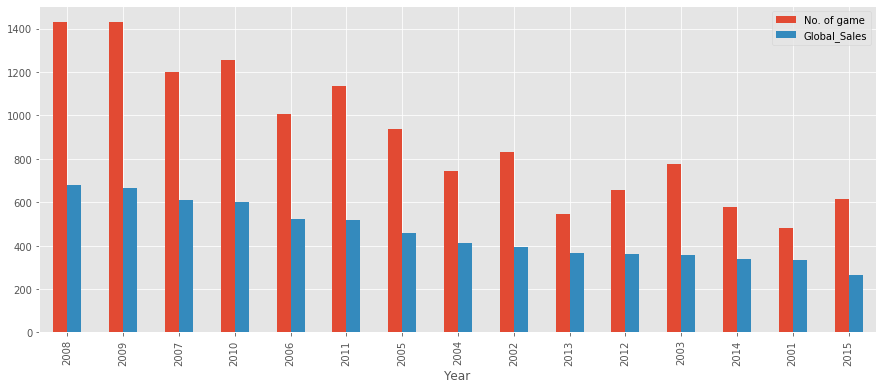

In [236]:
plot5.plot(kind='bar',x='Year',y=['No. of game','Global_Sales'],figsize=(15,6))

In [212]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,No. of game
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1


### Top 100 game's platforms :

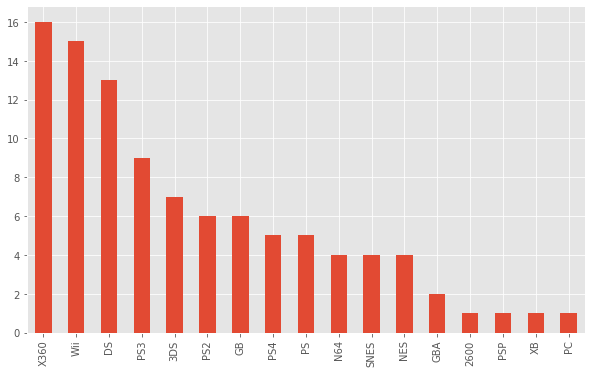

In [238]:
plot6 = df.head(100)['Platform'].value_counts()
plot6.plot(kind='bar',figsize=(10,6))

In [217]:
df['Platform'].nunique()

31